In [52]:
import matplotlib.pyplot as plt
import numpy as np
import time
from os.path import join
from os import listdir

In [2]:
measure2index={"x-coordinate":0,"y-coordinate":1,"timestamp":2, "button_status":3,"pressure":4, "tilt":5,"elevation":6}
index2measure=list(measure2index.keys())

task2index={"spiral":0,"l":1,"le":2 ,"les":3,"lektorka" :4,"porovnat":5,"nepopadnout":6, "tram":7}
index2task=list(task2index.keys())

In [3]:
index2measure

['x-coordinate',
 'y-coordinate',
 'timestamp',
 'button_status',
 'pressure',
 'tilt',
 'elevation']

In [4]:
index2task

['spiral', 'l', 'le', 'les', 'lektorka', 'porovnat', 'nepopadnout', 'tram']

In [9]:
data_path=join("..","PaHaW","PaHaW_public")#/00026/00026__1_1.svc"
folder_path=listdir(data_path)
folder_path.sort()

In [79]:
meta_path=join("..","PaHaW","corpus_PaHaW.csv")
meta_data=[]
with open(meta_path) as file:
    for line in file.readlines():
        meta_data.append(line.split(";"))
meta_data.pop(0)
meta_data=np.asarray(meta_data)
labels=[1 if i =="ON" else 0 for i in meta_data[:,4]]


In [72]:
task_path=listdir(join(data_path,folder_path[46]))
task_path.sort()

Subjects 46,
60 and
66 didn't perform the spiral !


In [101]:
raw=[]
for folder in folder_path:
    subject=[]
    task_path=listdir(join(data_path,folder))
    task_path.sort()
    if len(task_path)!=8:#subject didn't perform the spiral
        subject.append([])#add an empty array so that all tasks are on the same column number
    for task in task_path:
        measures=[]
        path=join(data_path,folder,task)
        with open(path) as file:
            for line in file.readlines():
                measures.append(line.split())
            measures.pop(0)
        subject.append(measures)
    raw.append(subject)

In [55]:
print("(75 subjects, 8 tasks, X task duration/200, 7 recorded signals)")
print(len(raw),len(raw[0]),len(raw[0][0]),len(raw[0][0][0]))

(75 subjects, 8 tasks, X task duration/200, 7 recorded signals)
75 8 1772 7


spiral
Subject n° 48 didn't perform task spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


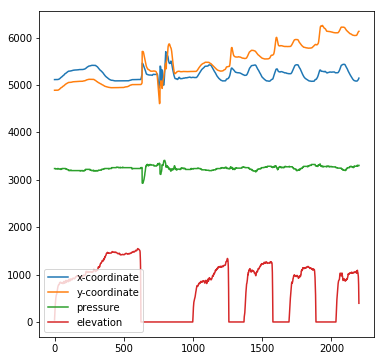

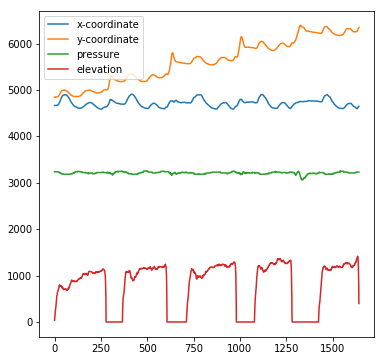

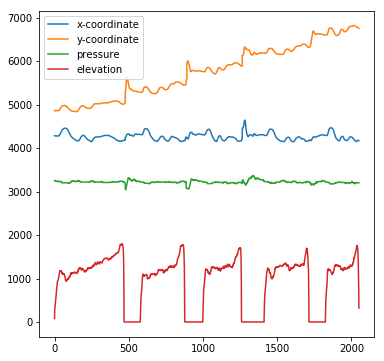

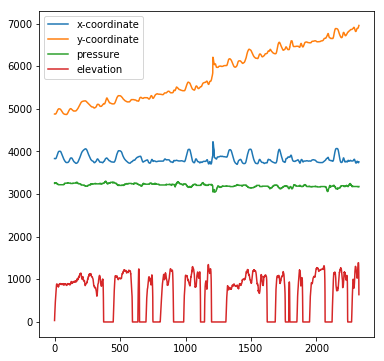

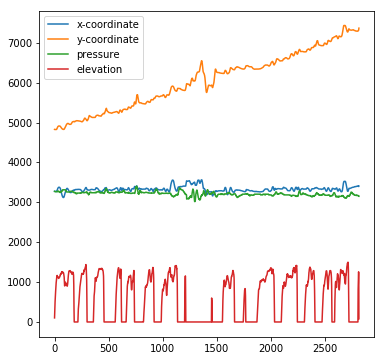

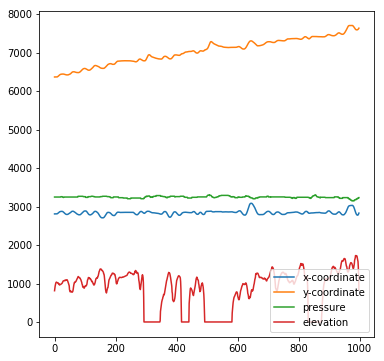

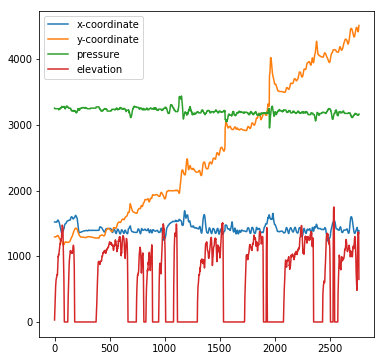

In [131]:
%matplotlib inline
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[66][j],dtype=int)
    if task.size!=0:
        plt.figure(figsize=(6,6))
        for i in [0,1,4,6]:
            plt.plot(task[:,i],label=index2measure[i])
            plt.legend()
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))
    

48
spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


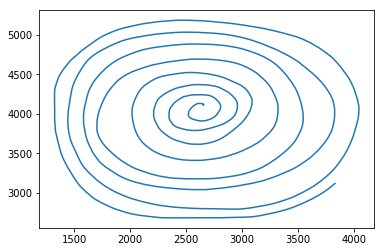

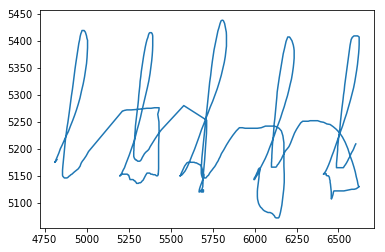

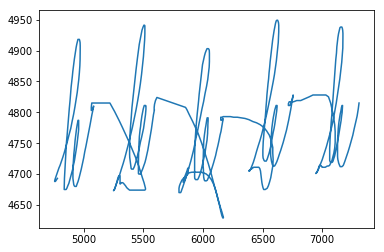

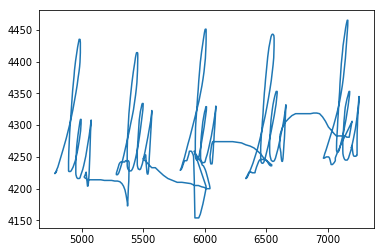

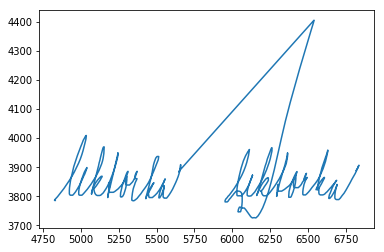

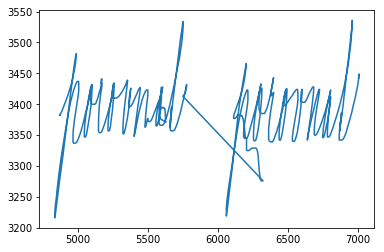

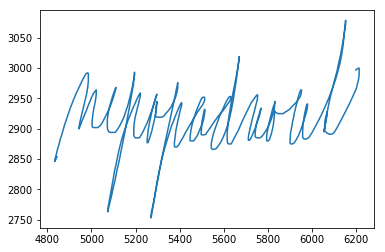

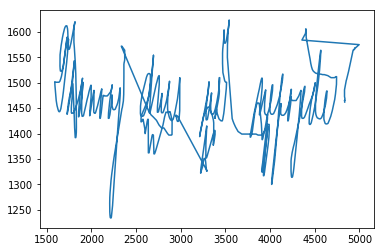

In [129]:
%matplotlib inline
subject_index=np.random.randint(0,len(labels))
print(subject_index)
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[subject_index][j],dtype=int)
    if task.size!=0:
        plt.figure()
        plt.plot(task[:,1],task[:,0])
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))